## 1 Image Transformation and Stitching


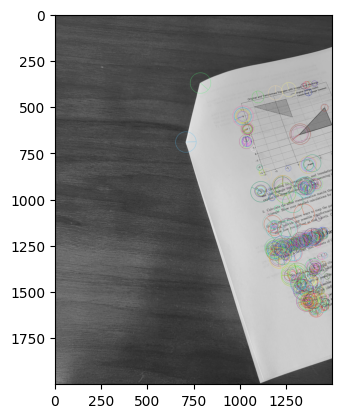

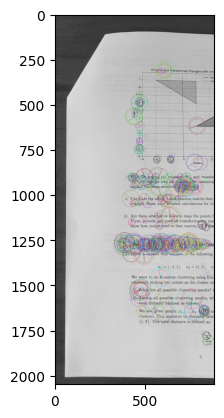

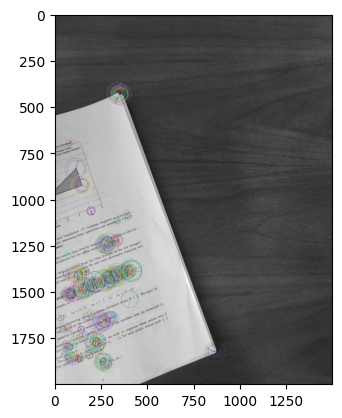

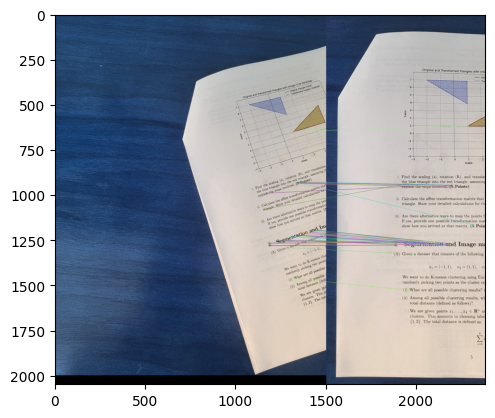

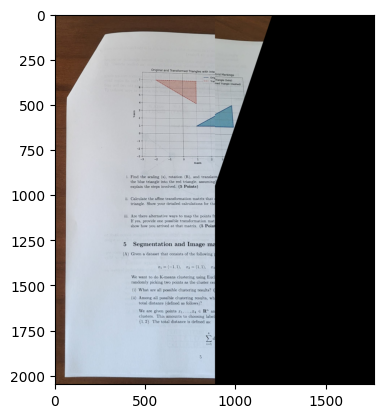

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
image1 = cv2.imread('1.jpeg')
image2 = cv2.imread('2.jpeg')
image3 = cv2.imread('3.jpeg')

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

## use SIFT to detect and compute keypoints and descriptors
# detector = cv2.SIFT_create()
## Use ORB to detect and compute keypoints and descriptors
detector = cv2.ORB_create()

keypoints1, descriptors1 = detector.detectAndCompute(gray1, None)
keypoints2, descriptors2 = detector.detectAndCompute(gray2, None)
keypoints3, descriptors3 = detector.detectAndCompute(gray3, None)

# display the keypoints as big red dots
plt.imshow(cv2.drawKeypoints(gray1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
plt.show()
plt.imshow(cv2.drawKeypoints(gray2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
plt.show()
plt.imshow(cv2.drawKeypoints(gray3, keypoints3, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS))
plt.show()



# Use BFMatcher to match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches12 = bf.match(descriptors1, descriptors2)
matches12 = sorted(matches12, key=lambda x: x.distance)

# Draw matches between images 1 and 2 (for visualization)
match_img12 = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches12[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# display the matches
plt.imshow(match_img12)
plt.show()

# Estimate affine transform and warp image1 to align with image2
src_pts12 = np.float32([keypoints1[m.queryIdx].pt for m in matches12]).reshape(-1, 2)
dst_pts12 = np.float32([keypoints2[m.trainIdx].pt for m in matches12]).reshape(-1, 2)

M12, mask12 = cv2.estimateAffinePartial2D(src_pts12, dst_pts12)

# Warp image1 to align with image2
height, width = image2.shape[:2]
warped_image1 = cv2.warpAffine(image1, M12, (width * 2, height))

# Place image2 on the stitched image
warped_image1[0:height, 0:width] = image2
stitched12 = warped_image1

# display the stitched image
plt.imshow(cv2.cvtColor(stitched12, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:

# Use BFMatcher to match descriptors between stitched12 and image3
keypoints_stitched, descriptors_stitched = detector.detectAndCompute(cv2.cvtColor(stitched12, cv2.COLOR_BGR2GRAY), None)

keypoints_stitched, descriptors_stitched, descriptors_stitched.shape



((< cv2.KeyPoint 0x7c2cae2ba670>,
  < cv2.KeyPoint 0x7c2cae8bd4a0>,
  < cv2.KeyPoint 0x7c2cae8bea60>,
  < cv2.KeyPoint 0x7c2cae8bd350>,
  < cv2.KeyPoint 0x7c2cae8bd6b0>,
  < cv2.KeyPoint 0x7c2cae8bffc0>,
  < cv2.KeyPoint 0x7c2cae8bff60>,
  < cv2.KeyPoint 0x7c2cae8bebb0>,
  < cv2.KeyPoint 0x7c2cae8bf420>,
  < cv2.KeyPoint 0x7c2cae8bc8d0>,
  < cv2.KeyPoint 0x7c2cae8bf0f0>,
  < cv2.KeyPoint 0x7c2cae8bd530>,
  < cv2.KeyPoint 0x7c2cae8bff30>,
  < cv2.KeyPoint 0x7c2cae8bea30>,
  < cv2.KeyPoint 0x7c2cae8beb80>,
  < cv2.KeyPoint 0x7c2cae8bed00>,
  < cv2.KeyPoint 0x7c2cae8bf3f0>,
  < cv2.KeyPoint 0x7c2cae8bfab0>,
  < cv2.KeyPoint 0x7c2cae8bd830>,
  < cv2.KeyPoint 0x7c2cae8bd4d0>,
  < cv2.KeyPoint 0x7c2cae8bef10>,
  < cv2.KeyPoint 0x7c2cae8bd320>,
  < cv2.KeyPoint 0x7c2cae8bf480>,
  < cv2.KeyPoint 0x7c2cae8bf4e0>,
  < cv2.KeyPoint 0x7c2cae8bf960>,
  < cv2.KeyPoint 0x7c2cae8bdad0>,
  < cv2.KeyPoint 0x7c2cae8bd860>,
  < cv2.KeyPoint 0x7c2cae8bfa80>,
  < cv2.KeyPoint 0x7c2cae8bfae0>,
  < cv2.KeyPoi

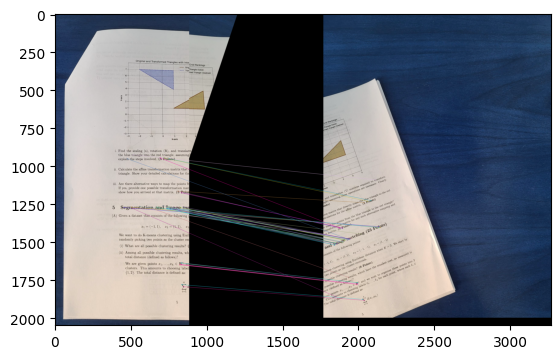

In [ ]:

matches23 = bf.match(descriptors_stitched, descriptors3)
matches23 = sorted(matches23, key=lambda x: x.distance)

# Draw matches between stitched12 and image3 (for visualization)
match_img23 = cv2.drawMatches(stitched12, keypoints_stitched, image3, keypoints3, matches23[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# display the matches
plt.imshow(match_img23)
plt.show()




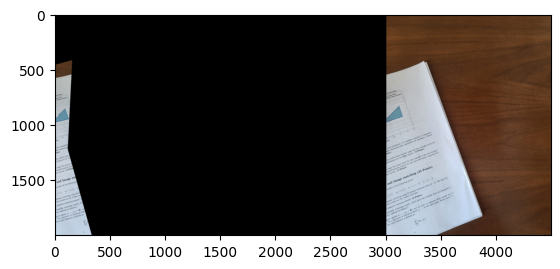

In [ ]:

# Estimate affine transform and warp stitched12 to align with image3
src_pts23 = np.float32([keypoints_stitched[m.queryIdx].pt for m in matches23]).reshape(-1, 2)
dst_pts23 = np.float32([keypoints3[m.trainIdx].pt for m in matches23]).reshape(-1, 2)

M23, mask23 = cv2.estimateAffinePartial2D(src_pts23, dst_pts23)

# Warp stitched12 to align with image3
height, width = image3.shape[:2]
warped_stitched12 = cv2.warpAffine(stitched12, M23, (width * 3, height))

# Place image3 on the stitched image
warped_stitched12[0:height, width * 2:width * 3] = image3

# display the final stitched image
plt.imshow(cv2.cvtColor(warped_stitched12, cv2.COLOR_BGR2RGB))
plt.show()

## Save the final stitched image
# cv2.imwrite('stitched_output.png', warped_stitched12)


In [ ]:
# plt.close()


## 2 Hough Transform

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the image
# image_path = 'runway.jpeg'
# image = cv2.imread(image_path)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian Blur to reduce noise
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# # Apply Canny Edge Detection
# edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

# # Define parameters for Hough Line Transform
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=100, maxLineGap=10)

# # Create a copy of the original image to draw lines on
# line_image = np.copy(image)

# # Draw detected lines on the image
# if lines is not None:
#     for line in lines:
#         x1, y1, x2, y2 = line[0]
#         cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 3)

# # Display the original, edges, and line-detected images
# plt.figure(figsize=(15, 10))
# plt.subplot(1, 3, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')

# plt.subplot(1, 3, 2)
# plt.imshow(edges, cmap='gray')
# plt.title('Edge Detection')

# plt.subplot(1, 3, 3)
# plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
# plt.title('Detected Runway Lines')

# plt.show()


In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

# # Load the image
# image_path = 'SpaceXmap.jpg'
# image = cv2.imread(image_path)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian Blur to reduce noise
# blurred = cv2.GaussianBlur(gray, (9, 9), 2)

# # Use Hough Circle Transform to detect circles
# # circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100,
# #                            param1=100, param2=30, minRadius=50, maxRadius=200)
# circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=150,
#                            param1=100, param2=40, minRadius=50, maxRadius=150)
# # Draw the detected circle on the original image
# output = image.copy()

# if circles is not None:
#     circles = np.round(circles[0, :]).astype("int")
#     for (x, y, r) in circles:
#         # Draw the circle in the output image
#         cv2.circle(output, (x, y), r, (0, 255, 0), 4)
#         print(f"Circle detected at ({x}, {y}) with radius {r}")
#         # Draw a small center dot
#         cv2.circle(output, (x, y), 5, (0, 0, 255), -1)

# # Display the result
# plt.figure(figsize=(10, 10))
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.title("Original Image")

# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
# plt.title("Detected Circle (Landing Pad)")

# plt.show()


In [ ]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

def gaussian_blur(image, kernel_size=5, sigma=1.4):
    """Apply Gaussian blur to reduce noise."""
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    m = kernel_size // 2
    n = kernel_size // 2
    for x in range(-m, m+1):
        for y in range(-n, n+1):
            kernel[x+m, y+n] = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= 2 * np.pi * sigma**2
    kernel /= kernel.sum()
    return ndimage.convolve(image, kernel)

def gradient_intensity(image):
    """Compute intensity gradient and direction of an image."""
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=np.float32)
    Ix = ndimage.convolve(image, Kx)
    Iy = ndimage.convolve(image, Ky)
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    return G, theta

def non_max_suppression(G, theta):
    """Suppress non-maximum pixels in the gradient directions."""
    M, N = G.shape
    Z = np.zeros((M, N), dtype=np.int32)
    angle = theta * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255

                # angle 0
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = G[i, j+1]
                    r = G[i, j-1]
                # angle 45
                elif 22.5 <= angle[i, j] < 67.5:
                    q = G[i+1, j-1]
                    r = G[i-1, j+1]
                # angle 90
                elif 67.5 <= angle[i, j] < 112.5:
                    q = G[i+1, j]
                    r = G[i-1, j]
                # angle 135
                elif 112.5 <= angle[i, j] < 157.5:
                    q = G[i-1, j-1]
                    r = G[i+1, j+1]

                if (G[i, j] >= q) and (G[i, j] >= r):
                    Z[i, j] = G[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass
    return Z

def threshold(image, low_threshold, high_threshold):
    """Apply double threshold to determine potential edges."""
    high = image.max() * high_threshold
    low = high * low_threshold
    M, N = image.shape
    res = np.zeros((M, N), dtype=np.int32)

    strong_i, strong_j = np.where(image >= high)
    weak_i, weak_j = np.where((image >= low) & (image < high))

    res[strong_i, strong_j] = 255
    res[weak_i, weak_j] = 25

    return res

def hysteresis(image):
    """Apply hysteresis to track edges."""
    M, N = image.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (image[i, j] == 25):
                if ((image[i+1, j-1] == 255) or (image[i+1, j] == 255) or (image[i+1, j+1] == 255)
                    or (image[i, j-1] == 255) or (image[i, j+1] == 255)
                    or (image[i-1, j-1] == 255) or (image[i-1, j] == 255) or (image[i-1, j+1] == 255)):
                    image[i, j] = 255
                else:
                    image[i, j] = 0
    return image

def canny_edge_detector(image, low_threshold=0.05, high_threshold=0.15):
    """Complete Canny edge detection implementation."""
    # Step 1: Gaussian Blur
    smoothed_image = gaussian_blur(image)

    # Step 2: Gradient Intensity and Direction
    G, theta = gradient_intensity(smoothed_image)

    # Step 3: Non-Maximum Suppression
    non_max_img = non_max_suppression(G, theta)

    # Step 4: Double Threshold
    threshold_img = threshold(non_max_img, low_threshold, high_threshold)

    # Step 5: Edge Tracking by Hysteresis
    img_final = hysteresis(threshold_img)

    return img_final

# # Example usage
# image = plt.imread('path/to/your/image.png')  # Replace with your grayscale image path
# edges = canny_edge_detector(image)

# plt.imshow(edges, cmap='gray')
# plt.title("Canny Edge Detection with NumPy")
# plt.show()


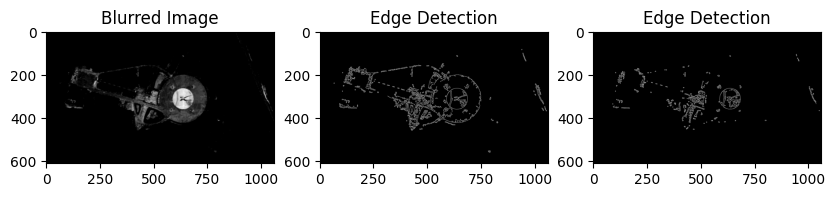

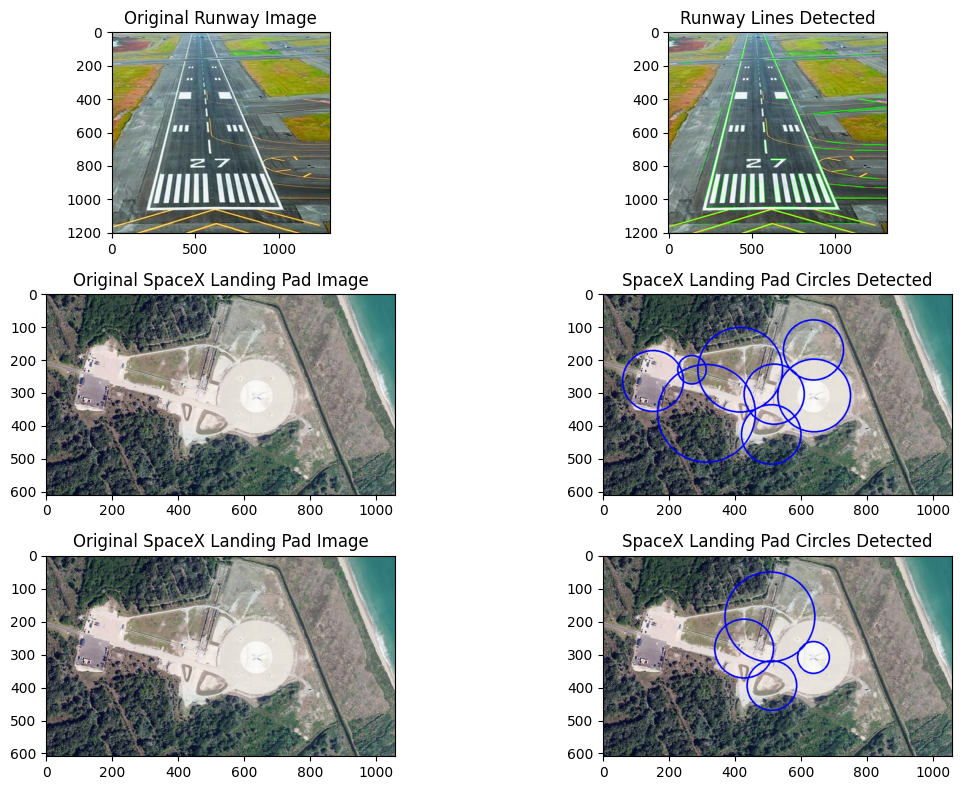

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Load images
runway_image = cv2.imread('runway.jpeg')
spacex_image = cv2.imread('SpaceXmap.jpg')

# Convert images to grayscale
runway_gray = cv2.cvtColor(runway_image, cv2.COLOR_BGR2GRAY)
spacex_gray = cv2.cvtColor(spacex_image, cv2.COLOR_BGR2GRAY)
# spacex_gray = spacex_image[:, :, 1]
# Apply Gaussian blur
runway_blur = cv2.GaussianBlur(runway_gray, (5, 5), 0)

spacex_gray1 = np.copy(spacex_gray)
spacex_gray2 = np.copy(spacex_gray)
threshold = 220
spacex_gray1[spacex_gray1<threshold] = threshold
threshold = 230
spacex_gray2[spacex_gray2<threshold] = threshold
# normalize the image
spacex_gray1 = cv2.normalize(spacex_gray1, None, 0, 255, cv2.NORM_MINMAX)
spacex_gray2 = cv2.normalize(spacex_gray2, None, 0, 255, cv2.NORM_MINMAX)
spacex_blur1 = cv2.GaussianBlur(spacex_gray1, (5, 5), 0)
spacex_blur2 = cv2.GaussianBlur(spacex_gray2, (5, 5), 0)

# assert runway_edges.shape, 'dont use cv2.canny'
# Edge detection using Canny
runway_edges = cv2.Canny(runway_blur, 50, 150)
spacex_edges1 = cv2.Canny(spacex_blur1, 50, 150)
spacex_edges2 = cv2.Canny(spacex_blur2, 50, 150)
# runway_edges = canny_edge_detector(runway_blur)
# spacex_edges = canny_edge_detector(spacex_blur)

# Hough Line Transform for runway image
lines = cv2.HoughLinesP(runway_edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)
runway_lines_img = runway_image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(runway_lines_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# show the spacex_edges
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(spacex_blur1, cmap='gray')
plt.title('Blurred Image')
plt.subplot(1, 3, 2)
plt.imshow(spacex_edges1, cmap='gray')
plt.title('Edge Detection')
# plt.show()
plt.subplot(1, 3, 3)
plt.imshow(spacex_edges2, cmap='gray')
plt.title('Edge Detection')
plt.show()


# Hough Circle Transform for SpaceX landing pad image
circles1 = cv2.HoughCircles(spacex_edges1, cv2.HOUGH_GRADIENT, dp=1.2, minDist=120, param1=100, param2=40, minRadius=20, maxRadius=150)
# circles = cv2.HoughCircles(spacex_edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100, param1=100, param2=30, minRadius=20, maxRadius=100)

circles2 = cv2.HoughCircles(spacex_edges2, cv2.HOUGH_GRADIENT, dp=1.2, minDist=120, param1=100, param2=40, minRadius=20, maxRadius=150)
# circles = cv2.HoughCircles(spacex_edges, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100, param1=100, param2=30, minRadius=20, maxRadius=100)


spacex_circles_img1 = spacex_image.copy()
spacex_circles_img2 = spacex_image.copy()
if circles1 is not None:
    circles = np.uint16(np.around(circles1))
    for circle in circles[0, :]:
        x, y, radius = circle
        cv2.circle(spacex_circles_img1, (x, y), radius, (255, 0, 0), 3)
if circles2 is not None:
    circles = np.uint16(np.around(circles2))
    for circle in circles[0, :]:
        x, y, radius = circle
        cv2.circle(spacex_circles_img2, (x, y), radius, (255, 0, 0), 3)

# Display images
plt.figure(figsize=(12, 8))

# Original and Processed Runway Image with Lines
plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(runway_image, cv2.COLOR_BGR2RGB))
plt.title('Original Runway Image')

plt.subplot(3, 2, 2)
plt.imshow(cv2.cvtColor(runway_lines_img, cv2.COLOR_BGR2RGB))
plt.title('Runway Lines Detected')

# Original and Processed SpaceX Image with Circles
plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(spacex_image, cv2.COLOR_BGR2RGB))
plt.title('Original SpaceX Landing Pad Image')

plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(spacex_circles_img1, cv2.COLOR_BGR2RGB))
plt.title('SpaceX Landing Pad Circles Detected')

plt.subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(spacex_image, cv2.COLOR_BGR2RGB))
plt.title('Original SpaceX Landing Pad Image')

plt.subplot(3, 2, 6)
plt.imshow(cv2.cvtColor(spacex_circles_img2, cv2.COLOR_BGR2RGB))
plt.title('SpaceX Landing Pad Circles Detected')

plt.tight_layout()
plt.show()


## 3 Segmentation   

### Method 1: Mean Shift Segmentation

Text(0.5, 1.0, 'Mean Shift Segmentation')

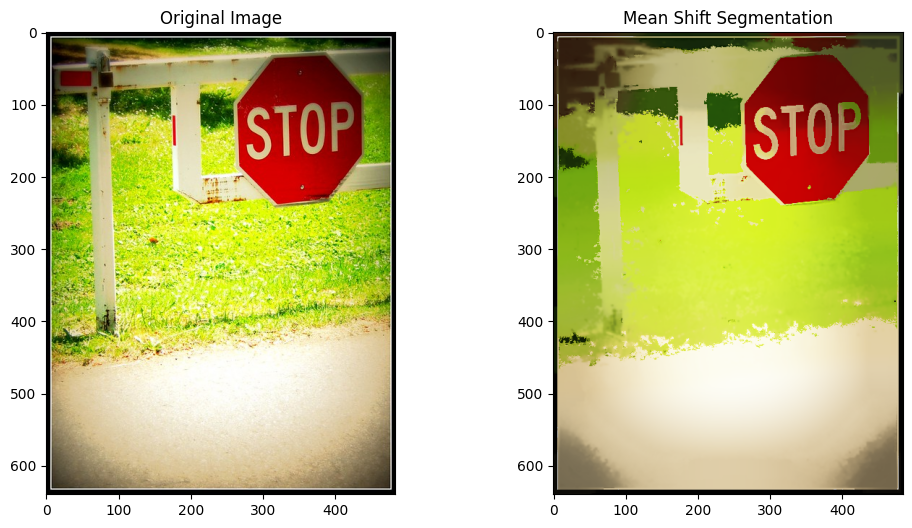

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('stop.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# explain the effect of different sp and sr
# sp is the spatial window radius
# sr is the color window radius
mean_shift = cv2.pyrMeanShiftFiltering(image, sp=40, sr=80)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(mean_shift, cv2.COLOR_BGR2RGB))
plt.title("Mean Shift Segmentation")

In [ ]:
# i = 0
# # use different sp and sr to see the effect
# for sp in range(10, 50, 10):
#     for sr in range(20, 100, 20):
#         M,N = len(range(10, 50, 10)), 2*len(range(20, 100, 20))
#         # Apply Mean Shift Segmentation
#         mean_shift = cv2.pyrMeanShiftFiltering(image, sp=sp, sr=sr)
#         i += 1
#         # Display the original and segmented image
#         plt.subplot(M, N, i)
#         plt.imshow(image_rgb)
#         plt.title("Original Image")
#         i += 1
#         plt.subplot(M, N, i)
#         plt.imshow(cv2.cvtColor(mean_shift, cv2.COLOR_BGR2RGB))
#         plt.title("Mean Shift Segmentation")
# plt.show()


### Method 2: Normalized Graph Cut Segmentation

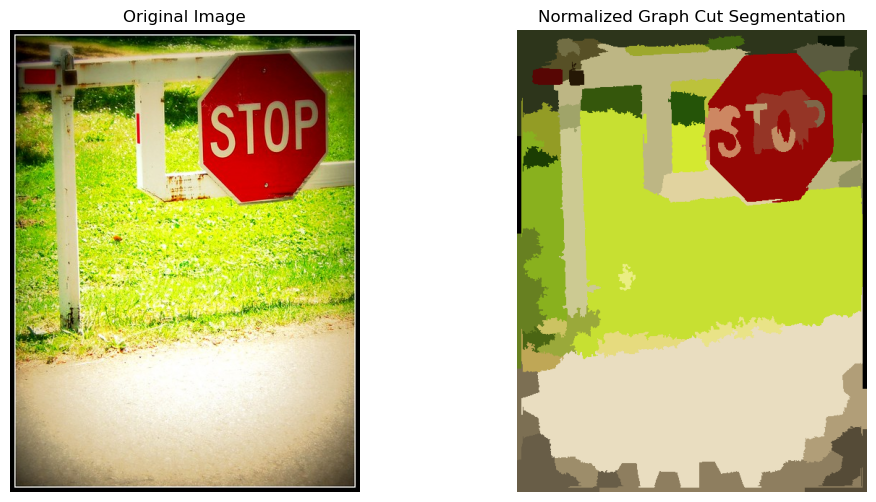

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import color, segmentation, graph
from skimage import graph

# Load the image
image = cv2.imread('stop.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 1: Superpixel Segmentation using SLIC
labels = segmentation.slic(image_rgb, compactness=30, n_segments=400, start_label=1)

# Step 2: Build Region Adjacency Graph (RAG)
# This creates a graph structure for the image based on mean color similarity.
rag = graph.rag_mean_color(image_rgb, labels, mode='similarity')

# Step 3: Apply Normalized Graph Cut
# The cut_normalized function applies a graph cut on the RAG.
# This returns a new labeling of the image, with regions being merged based on minimum normalized cut.
labels_normalized_cut = graph.cut_normalized(labels, rag)

# Step 4: Display the segmented result
# Convert labels to color image for visualization
segmented_image = color.label2rgb(labels_normalized_cut, image_rgb, kind='avg')

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.axis('off')
plt.title("Normalized Graph Cut Segmentation")

plt.show()


In [5]:
# from skimage import segmentation, color
# from skimage import graph
# import cv2
# import matplotlib.pyplot as plt

# # Load and convert image
# image = cv2.imread('stop.jpg')
# # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Superpixel segmentation with a higher number of segments
# labels = segmentation.slic(image_rgb, compactness=30, n_segments=600)  # Try increasing n_segments

# # Visualize the segmented labels
# plt.figure(figsize=(8, 6))
# plt.imshow(labels)
# plt.title("Superpixel Segmentation")
# plt.show()

# # Convert labels to RGB colors by taking mean color of each segment
# out1 = color.label2rgb(labels, image_rgb, kind='avg')
# plt.figure(figsize=(8, 6))
# plt.imshow(out1)
# plt.title("Average Color Per Segment")
# plt.show()

# # Generate the RAG and visualize it
# g = graph.rag_mean_color(image_rgb, labels)
# plt.figure(figsize=(8, 6))
# plt.imshow(color.label2rgb(labels, image_rgb, kind='avg'))
# plt.title("RAG Mean Color")
# plt.show()



# # Perform normalized cut
# normalized_cut = graph.cut_normalized(labels, g)

# # Show the normalized cut result
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.imshow(labels)
# plt.title("Labels")

# plt.subplot(1, 2, 2)
# plt.imshow(normalized_cut, cmap='nipy_spectral')
# plt.title("Normalized Cut Result")
# plt.show()

In [ ]:
# from skimage import segmentation, color
# from skimage import graph

# # Load and convert image
# image = cv2.imread('stop.jpg')
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Superpixel segmentation
# labels = segmentation.slic(image_rgb, compactness=30, n_segments=400)

# plt.imshow(labels)
# plt.title("Mean Color Labels")
# plt.show()
# # Convert labels to RGB colors by taking mean color of each segment
# out1 = color.label2rgb(labels, image_rgb, kind='avg')
# plt.imshow(out1)
# plt.title("Mean Color Labels")
# plt.show()
# # out1[out1>250] = 250
# # Normalized graph cut approximation


# g = graph.rag_mean_color(image_rgb, labels)
# # plt.imshow(g)
# # plt.title("Mean Color Labels")
# # plt.show()


# normalized_cut = graph.cut_normalized(labels, g)

# # show the labels here
# plt.figure(figsize=(12, 6))

# plt.subplot(1,2,1)
# plt.imshow(labels)
# plt.subplot(1,2,2)
# # plt.imshow(g)
# plt.imshow(normalized_cut)
# labels


# # # show the labels here
# # plt.imshow(normalized_cut)

# # Color each segment
# out = color.label2rgb(normalized_cut, image_rgb, kind='avg')

# # Display the original and segmented image
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.imshow(image_rgb)
# plt.title("Original Image")
# plt.subplot(1, 2, 2)
# plt.imshow(out)
# plt.title("Graph Cut Segmentation")
# plt.show()


In [ ]:
# !pip install scikit-image
# !pip install opencv-contrib-python

In [6]:

# import matplotlib.pyplot as plt
# from skimage import io, segmentation, color
# from skimage import graph
# from skimage.measure import label
# from skimage.color import rgb2lab

# # Load the image
# image = cv2.imread('stop.jpg')
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Perform SLIC superpixel segmentation with skimage
# segments_slic = segmentation.slic(image, n_segments=300, compactness=10, start_label=1)

# # Color each segment with average color for visualization
# segmented_image = color.label2rgb(segments_slic, image, kind='avg')

# # Display the original and segmented images
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.imshow(image)
# plt.title("Original Image")
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(segmented_image)
# plt.title("SLIC Superpixel Segmentation")
# plt.axis('off')
# plt.show()


## 4 Creative Section

In [ ]:
# This annotation format matches the COCO (Common Objects in Context) dataset format.
# The key indicators are:
# - segmentation in polygon format
# - area field
# - iscrowd flag
# - image_id
# - bbox in [x,y,width,height] format
# - category_id
# - instance id
#
# This appears to be from the COCO dataset, which is a large-scale object detection,
# segmentation, and captioning dataset.


In [ ]:

import cv2
import numpy as np
from skimage import color, segmentation, filters, measure
from sklearn.cluster import KMeans
from skimage.segmentation import watershed, felzenszwalb
from skimage.filters import sobel
from scipy.stats import mode
import matplotlib.pyplot as plt

def segment_kmeans(image, n_clusters=3):
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    pixel_values = lab_image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(pixel_values)
    segmented_image = labels.reshape((lab_image.shape[:2]))
    return segmented_image

def segment_watershed(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gradient = sobel(gray)
    markers = measure.label(gradient < 0.05, connectivity=1)
    labels = watershed(gradient, markers, mask=gray)
    return labels

def segment_mean_shift(image, spatial_radius=20, color_radius=30):
    mean_shift_result = cv2.pyrMeanShiftFiltering(image, spatial_radius, color_radius)
    gray = cv2.cvtColor(mean_shift_result, cv2.COLOR_BGR2GRAY)
    _, segmented_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return measure.label(segmented_image, connectivity=1)

def segment_grabcut(image):
    mask = np.zeros(image.shape[:2], np.uint8)
    rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64)
    cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    segmented_image = mask2 * 255
    return measure.label(segmented_image, connectivity=1)

def segment_otsu(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, segmented_image = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return measure.label(segmented_image, connectivity=1)

def segment_felzenszwalb(image, scale=100, sigma=0.5, min_size=50):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    labels = felzenszwalb(image_rgb, scale=scale, sigma=sigma, min_size=min_size)
    return labels

def combine_segmentations(*segmentation_results):
    combined = np.stack(segmentation_results, axis=-1)
    majority_vote_result, _ = mode(combined, axis=-1)
    majority_vote_result = majority_vote_result.squeeze()
    return majority_vote_result

def compute_different_segmentation_methods(image_path):
    # Read the input image
    image = cv2.imread(image_path)

    # Apply each segmentation method
    kmeans_result = segment_kmeans(image)
    watershed_result = segment_watershed(image)
    mean_shift_result = segment_mean_shift(image)
    grabcut_result = segment_grabcut(image)
    otsu_result = segment_otsu(image)
    felzenszwalb_result = segment_felzenszwalb(image)

    # # Combine results using majority voting
    # combined_result = combine_segmentations(
    #     kmeans_result, watershed_result, mean_shift_result,
    #     grabcut_result, otsu_result, felzenszwalb_result
    # )
    return kmeans_result, watershed_result, mean_shift_result, felzenszwalb_result


    combined_result = combine_segmentations(
        kmeans_result, watershed_result, mean_shift_result, felzenszwalb_result
    )

def plot_segmenttations_result(combined_result, result_all):
    kmeans_result, watershed_result, mean_shift_result, felzenszwalb_result = result_all
    # Display the results
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    ax = axes.ravel()
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[1].imshow(kmeans_result, cmap='nipy_spectral')
    ax[1].set_title("K-means Segmentation")
    ax[2].imshow(watershed_result, cmap='nipy_spectral')
    ax[2].set_title("Watershed Segmentation")
    ax[3].imshow(mean_shift_result, cmap='nipy_spectral')
    ax[3].set_title("Mean Shift Segmentation")
    # ax[4].imshow(grabcut_result, cmap='nipy_spectral')
    # ax[4].set_title("GrabCut Segmentation")
    # ax[5].imshow(otsu_result, cmap='nipy_spectral')
    # ax[5].set_title("Otsu's Thresholding Segmentation")
    ax[6].imshow(felzenszwalb_result, cmap='nipy_spectral')
    ax[6].set_title("Felzenszwalb Segmentation")
    ax[7].imshow(combined_result, cmap='nipy_spectral')
    ax[7].set_title("Combined Segmentation")

    for a in ax:
        a.axis("off")
    plt.tight_layout()
    plt.show()
    return combined_result
# # Example usage:
# name = r'000000542054.jpg'
# combined_result = compare_and_combine_segmentation_methods(name)



In [ ]:

# # Function to compare segmentation results
# def compare_segmentation_methods(image_path):
#     # Read the input image
#     image = cv2.imread(image_path)

#     # Apply each segmentation method
#     kmeans_result = segment_kmeans(image)
#     watershed_result = segment_watershed(image)
#     mean_shift_result = segment_mean_shift(image)

#     # Plot the results
#     fig, axes = plt.subplots(1, 4, figsize=(15, 5))
#     ax = axes.ravel()
#     ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#     ax[0].set_title("Original Image")
#     ax[1].imshow(cv2.cvtColor(kmeans_result, cv2.COLOR_BGR2RGB))
#     ax[1].set_title("K-means Segmentation")
#     ax[2].imshow(cv2.cvtColor(watershed_result, cv2.COLOR_BGR2RGB))
#     ax[2].set_title("Watershed Segmentation")
#     ax[3].imshow(cv2.cvtColor(mean_shift_result, cv2.COLOR_BGR2RGB))
#     ax[3].set_title("Mean Shift Segmentation")

#     for a in ax:
#         a.axis("off")
#     plt.tight_layout()
#     plt.show()

# name = r'000000542054.jpg'
# # Example usage:
# compare_segmentation_methods(name)


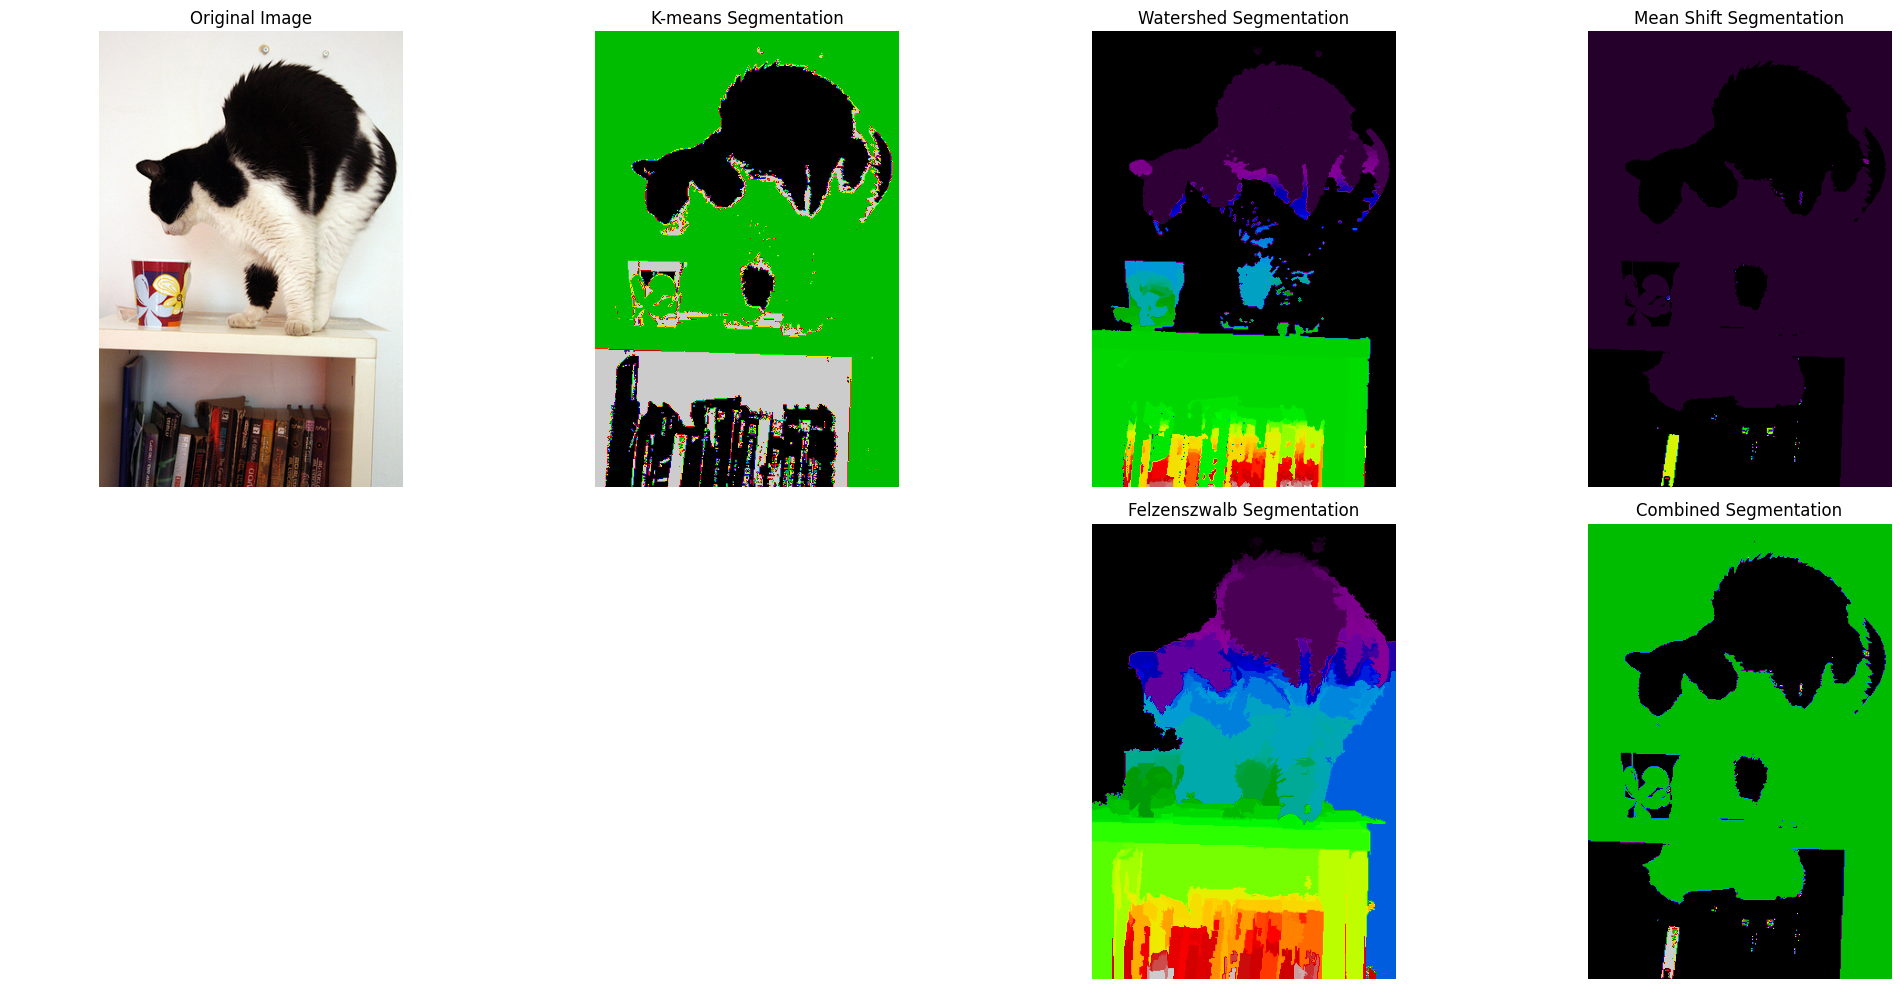

In [ ]:

# Example usage:
name = r'000000542054.jpg'

image = cv2.imread(name)
result_all = compute_different_segmentation_methods(name)
# result_all
combined_result = combine_segmentations(*result_all)
# combined_result
# combined_result.shape
_ = plot_segmenttations_result(combined_result, result_all)





In [ ]:
# transform the different unconnected regions in combined_result into different labels
combined_result_int = np.copy(combined_result)

# from  combined_result_int find out the connected region, and give them different value in the original image
from scipy.ndimage import label

# combined_result_int[combined_result_int>1] = 0
# Initialize an empty array to store the labeled regions
labeled_image = np.zeros_like(combined_result_int, dtype=int)

# Process each unique value separately to label connected regions
unique_values = np.unique(image)
for value in unique_values:
    # Create a binary mask for the current value
    binary_mask = (combined_result_int == value)

    # Label the connected components in the binary mask
    labeled_mask, num_features = label(binary_mask)

    # Assign unique labels in the main labeled_image array
    labeled_image[binary_mask] = labeled_mask[binary_mask] + np.max(labeled_image)

# # Plot the labeled regions

# plt.figure(figsize=(10,10))
# plt.imshow(labeled_image, cmap='tab20b')
# plt.colorbar()
# plt.show()
# plt.close('all')

In [ ]:
# !pip install pycocotools

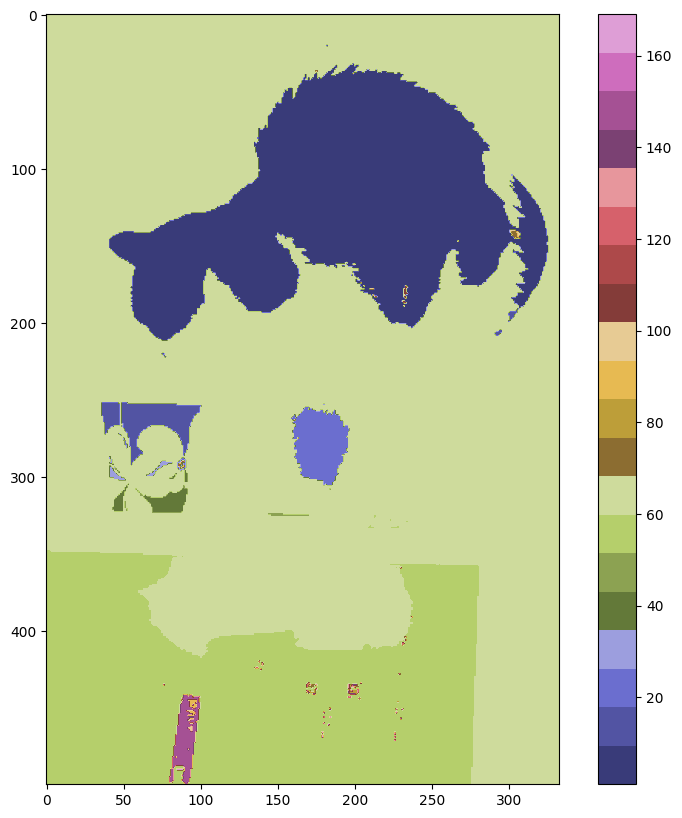

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
IoU for annotation 49095: 0.5391
IoU for annotation 676737: 0.2066
IoU for annotation 1138691: 0.5446
Mean IoU for image 542054: 0.4301


In [ ]:
import json
import numpy as np
import cv2
# pip install pycocotools
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils

def load_coco_annotations(annotation_file, image_id):
        # Load and convert annotations to expected dictionary format
    with open(annotation_file, 'r') as f:
        annotations_list = json.load(f)

    # Convert list to COCO-compatible dictionary format
    annotations_dict = {
        "images": [{"id": image_id}],
        "annotations": annotations_list,
        "categories": []
    }

    # Save converted annotations to temporary file
    with open('temp_annotations.json', 'w') as f:
        json.dump(annotations_dict, f)

    # Now load with COCO API
    coco = COCO('temp_annotations.json')
    annotations = coco.loadAnns(coco.getAnnIds(imgIds=[image_id]))

    # coco = COCO(annotation_file)
    # annotations = coco.loadAnns(coco.getAnnIds(imgIds=[image_id]))
    return annotations

def create_mask_from_coco_annotation(annotation, height, width):
    if 'segmentation' in annotation:
        rle = maskUtils.frPyObjects(annotation['segmentation'], height, width)
        mask = maskUtils.decode(rle)
        mask = np.sum(mask, axis=2) if mask.ndim == 3 else mask
        mask = mask.astype(np.uint8)
    else:
        mask = np.zeros((height, width), dtype=np.uint8)
    return mask

def compute_iou(pred_mask, gt_mask):
    intersection = np.logical_and(pred_mask, gt_mask)
    union = np.logical_or(pred_mask, gt_mask)
    iou = np.sum(intersection) / np.sum(union)
    return iou

def main(annotation_file, image_id, predicted_mask):
    # Load COCO annotations for the specified image
    annotations = load_coco_annotations(annotation_file, image_id)
    image_height, image_width = predicted_mask.shape

    # Iterate over each ground truth object in the image
    iou_scores = []
    for annotation in annotations:
        gt_mask = create_mask_from_coco_annotation(annotation, image_height, image_width)
        max_iou = 0
        # for labels in unique(predicted_mask):
        unique_values = np.unique(predicted_mask)
        for value in unique_values:
            # Create a binary mask for the current value
            binary_mask = (predicted_mask == value)


            # Calculate IoU between predicted mask and ground truth mask
            iou = compute_iou(binary_mask, gt_mask)
            if iou > max_iou:
                max_iou = iou
        iou_scores.append(max_iou)
        print(f"IoU for annotation {annotation['id']}: {max_iou:.4f}")

    # Average IoU score for all annotations in the image
    mean_iou = np.mean(iou_scores) if iou_scores else 0
    print(f"Mean IoU for image {image_id}: {mean_iou:.4f}")
    return iou_scores

# Example usage
# Define paths
image_path = r'000000542054.jpg'
annotation_file = 'annotations_542054.json'  # Path to COCO annotation file
image_id = 542054  # Replace with actual COCO image ID

image = cv2.imread(image_path)
height, width,_ = image.shape
predicted_mask = np.zeros((height, width), dtype=np.uint8)  # Replace with your predicted mask

predicted_mask = labeled_image
# import matplotlib
# matplotlib.use('Qt5Agg')
# import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(labeled_image, cmap='tab20b')
plt.colorbar()
plt.show()
plt.close('all')


# Compute IoU
iou_scores = main(annotation_file, image_id, predicted_mask)
